#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Task 3: Load the Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/kc_house_data.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

##Get Data Info

In [5]:
data.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##Find Missing Values

In [7]:
data.isnull().values.any()

False

#Task 5: Perform Data Cleaning

In [8]:
#N/A

#Task 6: Visualize Cleaned up Dataset

#Task 7: Conceptualize the problem

In [9]:
# If your job is to predict a price based on all the parameters below it will take longer
# we want to create a linear regression with all, some, or one parameter
# what 1 column can we look at from the columns below -- sqft_living the square footage
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# name the variables whatever you want
# this show you can pick and choose what columns,dimensions,parameters to carry out analysis
# the best way is by starting with 1 parameter
space = data['sqft_living']
price = data['price']

In [11]:
# This is a column
space

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [12]:
# Make a matrix out of the two variables created which are columns
# Change X into 2D array
X = np.array(space).reshape(-1, 1)
Y = np.array(price)

In [13]:
# Looks like it does before space variable except now has square brackets
# This means it is a matrix aka 2d array
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [14]:
# This array is not reshaped
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

#Task 8: Perform Data-Split

In [15]:
# Now we can do data split
# Split data into train sets and test sets
# now we are telling the machine take 30% and make it into test
# random state is to have similar results so you want the same state
# You can change the state to whatever number and the accuracy should stay the same cause its clean data
# but will have differentiation variation of the splitting
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

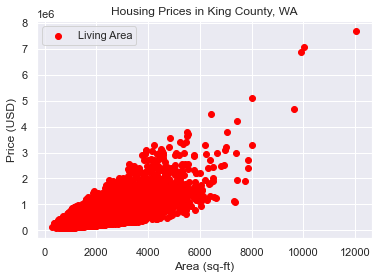

In [16]:
# Look at the data before the machine alogirthm does its thing
plt.scatter(X_train,Y_train, color="red", label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

#Task 9: Choose the ML Method to follow

In [17]:
regressor = LinearRegression()

#Task 10: Train the ML Model

In [18]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Task 11: Test the Model

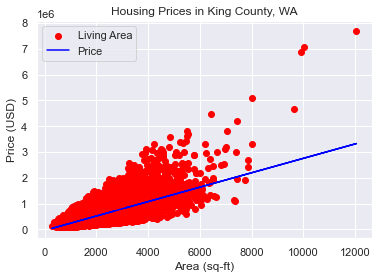

In [19]:
# Visualize training set
# What the regressor predicted 
plt.scatter(X_train,Y_train,color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
# now plotting the regressor line what its predicting
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [20]:
# test to see if the model works
# going to predict based on the testing data created X_Test
y_pred = regressor.predict(X_test)
# Now we need to give it new data, new parameters for our algoirthm
# based on that one parameter we chose (living area) 

In [22]:
# tell me the price based on the area given
area = 3500

price = regressor.predict([[area]])

print('House of %d sq-ft costs about $%d' % (area, price))

House of 3500 sq-ft costs about $936337


### Another Parameter

In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
# using a different paramater aka column aka dimension 
# to keep our data seperate change the variable name
space2 = data['sqft_lot']
price = data['price']

In [25]:
X = np.array(space2).reshape(-1, 1)
Y = np.array(price)

In [26]:
# Have to resplit since the data changed
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [27]:
# Need to retrain or refit since its different data
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
y_pred2 = regressor.predict(X_test)

In [30]:
area = 2500

price = regressor.predict([[area]])

print('House of %d sq-ft-lot costs about $%d' % (area, price))

House of 2500 sq-ft-lot costs about $527144
